In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kf_combined_data.csv')

In [3]:
df.head()

,transaction_id,date,branch_id,branch_name,kota,provinsi,branch_category,customer_name,product_id,product_name,product_category,transaction_price,product_price,discount_percentage,transaction_rating,branch_rating,inventory_id,opname_stock
0,TRX4644956,2020-03-14,11079,Kimia Farma - Klinik & Apotek,Purwokerto,Jawa Tengah,Klinik & Apotek,Crystal Maxwell,KF116,"Psycholeptics drugs, Hypnotics and sedatives d...",R06,251700,251700,0.04,3.8,4.7,INV5504130,83.0
1,TRX4644956,2020-03-14,11079,Kimia Farma - Klinik & Apotek,Purwokerto,Jawa Tengah,Klinik & Apotek,Crystal Maxwell,KF116,"Psycholeptics drugs, Hypnotics and sedatives d...",R06,251700,251700,0.04,3.8,4.7,INV2365240,22.0
2,TRX4644956,2020-03-14,11079,Kimia Farma - Klinik & Apotek,Purwokerto,Jawa Tengah,Klinik & Apotek,Crystal Maxwell,KF116,"Psycholeptics drugs, Hypnotics and sedatives d...",R06,251700,251700,0.04,3.8,4.7,INV3669447,94.0
3,TRX6174899,2021-09-10,11079,Kimia Farma - Klinik & Apotek,Purwokerto,Jawa Tengah,Klinik & Apotek,Pamela Davis,KF116,"Psycholeptics drugs, Hypnotics and sedatives d...",R06,251700,251700,0.03,4.0,4.7,INV5504130,83.0
4,TRX6174899,2021-09-10,11079,Kimia Farma - Klinik & Apotek,Purwokerto,Jawa Tengah,Klinik & Apotek,Pamela Davis,KF116,"Psycholeptics drugs, Hypnotics and sedatives d...",R06,251700,251700,0.03,4.0,4.7,INV2365240,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700663 entries, 0 to 2700662
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   date                 object 
 2   branch_id            int64  
 3   branch_name          object 
 4   kota                 object 
 5   provinsi             object 
 6   branch_category      object 
 7   customer_name        object 
 8   product_id           object 
 9   product_name         object 
 10  product_category     object 
 11  transaction_price    int64  
 12  product_price        int64  
 13  discount_percentage  float64
 14  transaction_rating   float64
 15  branch_rating        float64
 16  inventory_id         object 
 17  opname_stock         float64
dtypes: float64(4), int64(3), object(11)
memory usage: 370.9+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## 1. Perbandingan Pendapatan Kimia Farma dari Tahun ke Tahun

In [6]:
df['year'] = df['date'].dt.year
df['total_revenue'] = df['transaction_price'] * (1 - df['discount_percentage'])
revenue_per_year = df.groupby('year')['total_revenue'].sum().reset_index()

In [12]:
revenue_per_year

,year,total_revenue
0,2020,3.234575e+11
1,2021,3.215197e+11
2,2022,3.228799e+11
3,2023,3.218395e+11


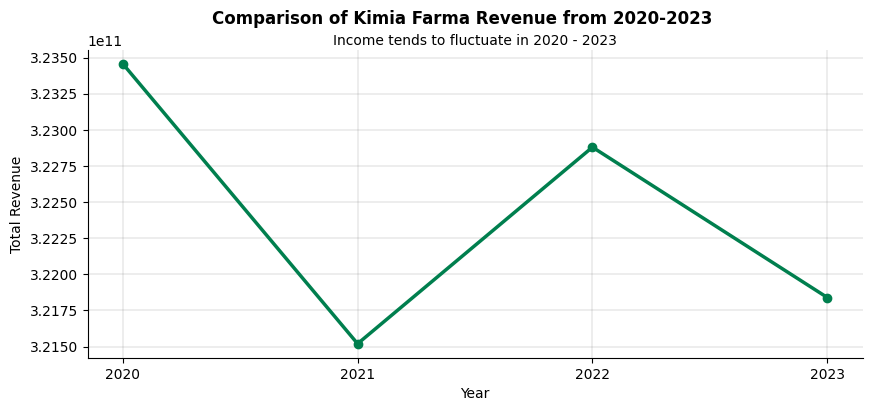

In [27]:
plt.figure(figsize=(10, 4))

plt.plot(revenue_per_year['year'], revenue_per_year['total_revenue'], 
         marker='o', linewidth=2.5, color='#007f4e')

plt.grid(linestyle='-', linewidth=0.2, color='grey')
plt.xticks(rotation=0)

#y_tick_label,location = plt.yticks()
#plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.title('Income tends to fluctuate in 2020 - 2023', fontsize=10, y=.990)
plt.suptitle('Comparison of Kimia Farma Revenue from 2020-2023', fontsize=12, fontweight='bold')

plt.xlabel('Year', size=10)
plt.ylabel('Total Revenue', size=10)

plt.xticks([2020, 2021, 2022, 2023])

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

## 2. Top 10 Total Transaksi Cabang Provinsi

In [28]:
total_transactions = df.groupby(['branch_id', 'provinsi']).size().reset_index(name='total_transactions')
top_10_transactions = total_transactions.sort_values(by='total_transactions', ascending=False).head(10)

In [39]:
top_10_transactions['branch_id'] = top_10_transactions['branch_id'].astype('object')
top_10_transactions

,branch_id,provinsi,total_transactions
1621,94478,Sumatera Utara,1933
1720,99758,Maluku Utara,1924
1100,66153,Sumatera Barat,1889
1114,66717,Jawa Barat,1886
1205,70656,Sulawesi Utara,1855
769,48617,Jawa Barat,1850
459,32276,Jawa Barat,1849
1219,71355,Jawa Barat,1843
1260,73855,Sumatera Barat,1836
1529,90145,Sumatera Utara,1835


## 3. Top 10 Nett Sales Cabang Provinsi

In [42]:
nett_sales = df.groupby(['branch_id', 'provinsi'])['total_revenue'].sum().reset_index()
top_10_sales = nett_sales.sort_values(by='total_revenue', ascending=False).head(10)

In [44]:
top_10_sales

,branch_id,provinsi,total_revenue
1219,71355,Jawa Barat,961071018.0
852,53167,Maluku,936997033.0
1720,99758,Maluku Utara,932714872.0
994,60888,Jawa Barat,919071272.0
1205,70656,Sulawesi Utara,913332086.0
431,30970,Jawa Barat,912358496.0
1221,71378,Gorontalo,909624731.0
89,15267,Jawa Tengah,907774025.0
898,55980,Jawa Barat,903594921.0
459,32276,Jawa Barat,900537091.0


## 4. Top 5 Cabang Dengan Rating Tertinggi, namun Rating Transaksi Terendah

In [45]:
average_transaction_rating = df.groupby('branch_id')['transaction_rating'].mean().reset_index()
branch_ratings = df[['branch_id', 'branch_rating']].drop_duplicates()

branch_info = pd.merge(branch_ratings, average_transaction_rating, on='branch_id')
branch_info = branch_info.sort_values(by=['branch_rating', 'transaction_rating'], ascending=[False, True])
top_5_branches = branch_info.head(5)

In [47]:
top_5_branches

,branch_id,branch_rating,transaction_rating
413,31872,5.0,3.919748
49,13775,5.0,3.921342
1271,82157,5.0,3.921555
162,19017,5.0,3.934887
1701,83104,5.0,3.942155


## 5. Pola Pendapatan Kimia Farma Setiap Bulannya

In [49]:
df['month'] = df['date'].dt.month

monthly_revenue = df.groupby('month')['total_revenue'].sum().reset_index()

In [60]:
monthly_revenue

,year,month,total_revenue
0,2020,1,2.754218e+10
1,2020,2,2.576126e+10
2,2020,3,2.755744e+10
3,2020,4,2.646588e+10
4,2020,5,2.782572e+10
5,2020,6,2.620280e+10
6,2020,7,2.718083e+10
7,2020,8,2.711051e+10
8,2020,9,2.630981e+10
9,2020,10,2.766175e+10


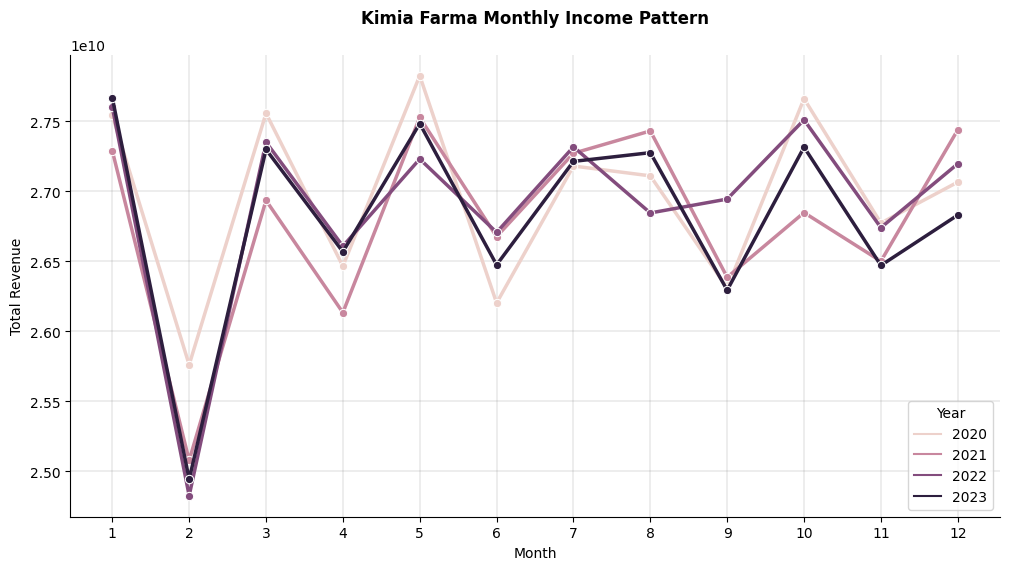

In [72]:
monthly_revenue = df.groupby(['year', 'month'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_revenue, x='month', y='total_revenue', hue='year', marker='o', linewidth=2.5)

plt.title('Kimia Farma Monthly Income Pattern', size=12, fontweight='bold', y=1.05)
plt.xlabel('Month', size=10)
plt.ylabel('Total Revenue', size=10)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

plt.legend(title='Year', loc=4)

plt.grid(linestyle='-', linewidth=0.2, color='grey')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


plt.show()

## 6. Kategori Produk dengan Pendapatan Tertinggi

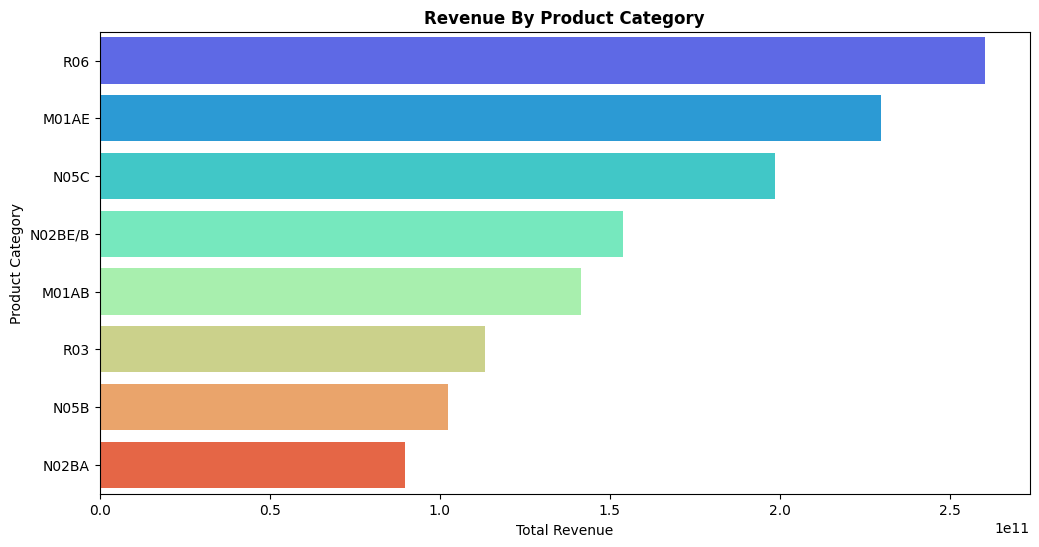

In [78]:
category_revenue = df.groupby('product_category')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=category_revenue, x='total_revenue', y='product_category', palette='rainbow')
plt.title('Revenue By Product Category', size=12, fontweight='bold')
plt.xlabel('Total Revenue', size=10)
plt.ylabel('Product Category', size=10)
plt.show()

## 7. Top 10 Produk dengan Penjualan Terbanyak

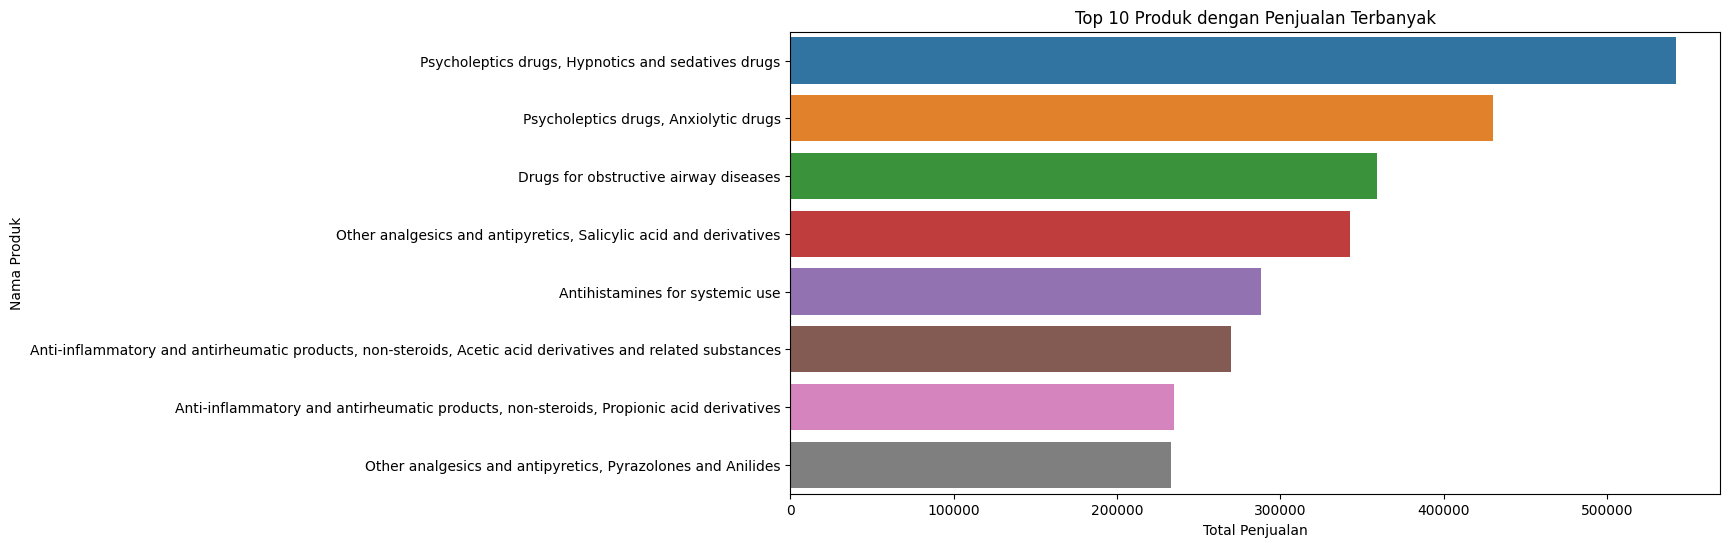

In [81]:
top_10_products = df.groupby('product_name')['transaction_id'].count().reset_index(name='total_sales').sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='total_sales', y='product_name')
plt.title('Top 10 Produk dengan Penjualan Terbanyak')
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Produk')
plt.show()

## 8. Top 5 Kota dengan Pendapatan Terbanyak

In [110]:
revenue_per_city

,kota,total_revenue
59,Subang,4.542542e+10
19,Garut,4.067098e+10
52,Purwakarta,3.835499e+10
55,Semarang,3.438102e+10
60,Sukabumi,3.384339e+10


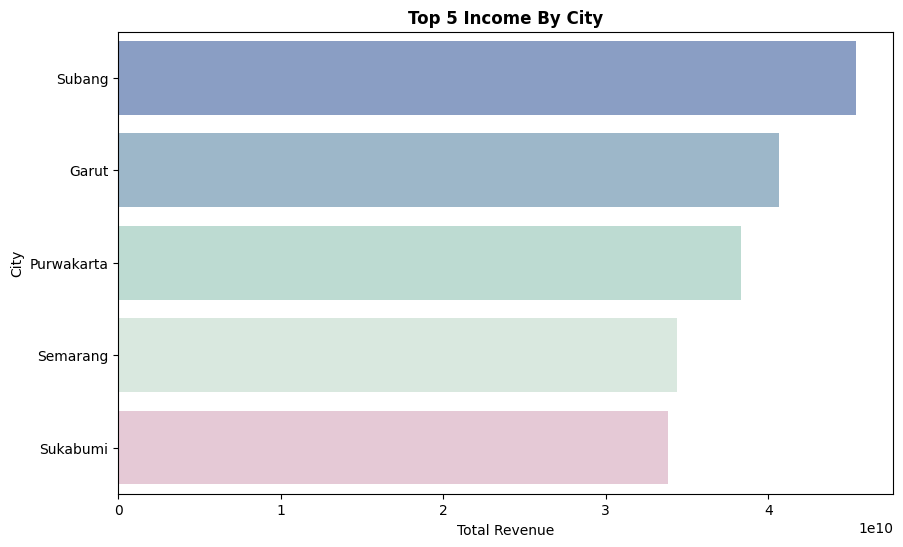

In [107]:
revenue_per_city = df.groupby('kota')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', 
                                                                                       ascending=False).head(5)

colors = ['#809bce', '#95b8d1', '#b8e0d4', '#d6eadf', '#eac4d5']

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_per_city, x='total_revenue', y='kota', palette=colors)
plt.title('Top 5 Income By City', size=12, fontweight='bold')
plt.xlabel('Total Revenue', size=10)
plt.ylabel('City', size=10)
plt.show()

## 9. Top 5 Provinsi dengan Pendapatan Terbanyak

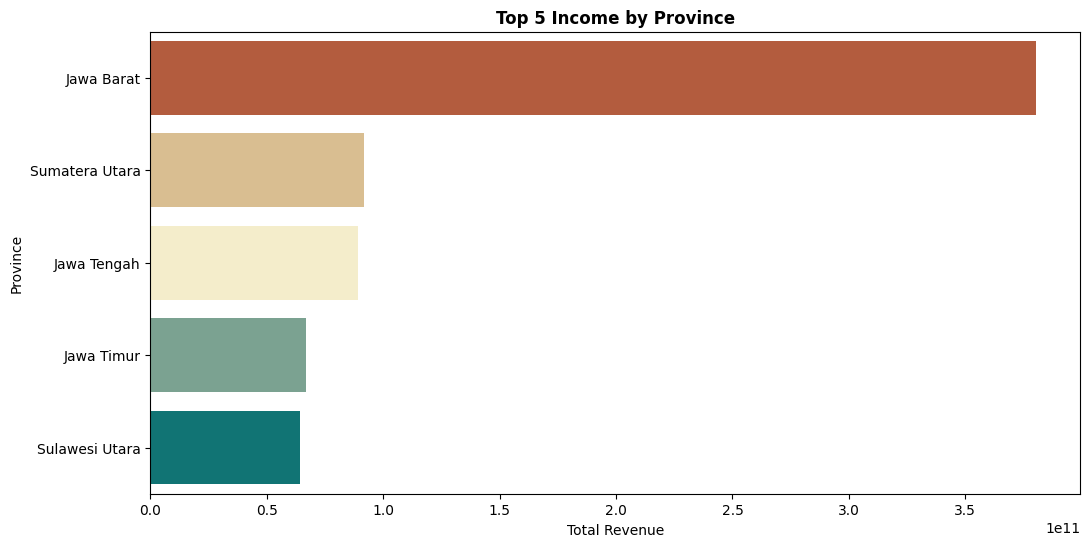

In [106]:
revenue_per_province = df.groupby('provinsi')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', 
                                                                                               ascending=False).head(5)

colors = ['#c7522a', '#e5c185', '#fbf2c4', '#74a892', '#008585']

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_per_province, x='total_revenue', y='provinsi', palette=colors)
plt.title('Top 5 Income by Province', size=12, fontweight='bold')
plt.xlabel('Total Revenue', size=10)
plt.ylabel('Province', size=10)
plt.show()